# 1. Imports and definiiton

In [ ]:
# import the library
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import calendar
import numpy as np
import matplotlib.dates as mdates
import sys
import os
from os import listdir
from os.path import isfile, join
from dateutil import parser
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, 
                              RandomForestRegressor, 
                              AdaBoostRegressor, 
                              BaggingRegressor, 
                              ExtraTreesRegressor,
                              HistGradientBoostingRegressor,
                              StackingRegressor,
                              VotingRegressor)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from datetime import datetime, timedelta
from matplotlib import animation
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
# from func_defs import *

# %matplotlib ipympl


# define the filename


# define the plot template
axis_label_size = 15
axis_num_size = 12
text_size = 12
title_size = 22

# define the figure size for single plot
figure_size = (6, 6)
subplot_size_1_2 = (6, 6)
long_hoz_figsize = (12, 6)

# 2. Electrical data visualisation

            Timestamp  Power
0 2020-06-01 00:00:00    0.0
1 2020-06-01 00:05:00    0.0
2 2020-06-01 00:10:00    0.0
3 2020-06-01 00:15:00    0.0
4 2020-06-01 00:20:00    0.0


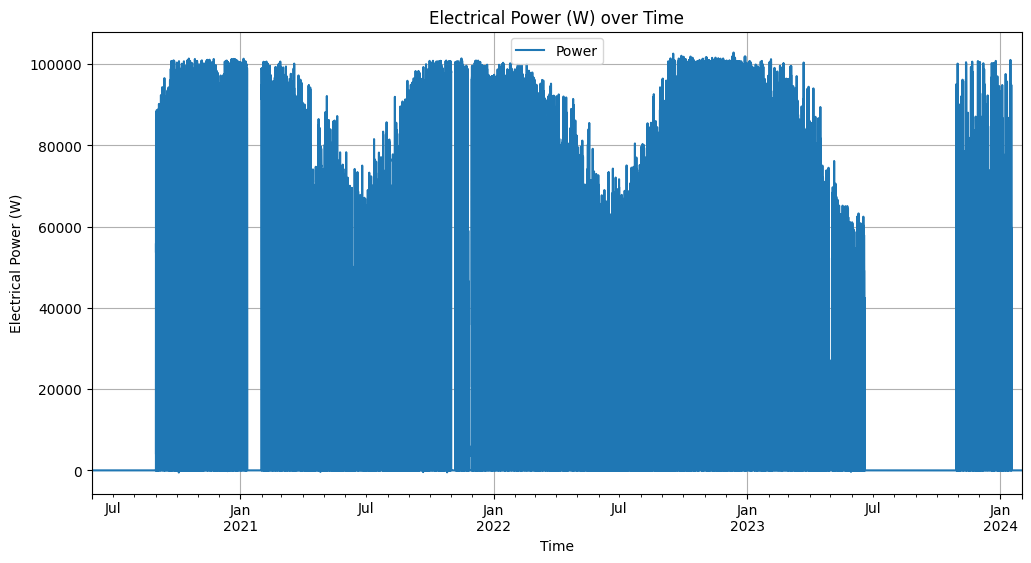

In [3]:
# Load the data from the pickle file
data_file = r"C:\Users\z5183876\OneDrive - UNSW\Documents\GitHub\25_08_26_Bomen_bifacial_gain\Data\full_site_pow_5min.pkl"
df = pd.read_pickle(data_file)

# print the head
print(df.head())

# plot the data, it only has one column
df.plot(x = 'Timestamp', y='Power', figsize=long_hoz_figsize)
plt.title('Electrical Power (W) over Time')
plt.xlabel('Time')
plt.ylabel('Electrical Power (W)')
plt.grid()
plt.show()

# 3. Weather data visualisation for PVsyst input weather data

Index(['Timestamp', 'Air Humidity (Avg )_median', 'Air Pressure (Avg )_median',
       'Air Temperature mean (Avg )_median',
       'Albedo Irradiance mean (Avg )_median',
       'GHI Irradiance mean (Avg )_median',
       'POA Irradiance mean (Avg )_median', 'Wind Direction (Avg )_median',
       'Wind Speed mean (Avg )_median', 'albedo_ratio_median',
       'albedo_ratio_resampled_median', 'Wind Speed (10m) mean (Avg )_median',
       'Air Temperature mean (Avg )', 'GHI Irradiance mean (Avg )'],
      dtype='object')
Humidity column found: ['Air Humidity (Avg )_median']
Temperature column found: ['Air Temperature mean (Avg )_median']
GHI column found: ['GHI Irradiance mean (Avg )']
Wind speed column found: ['Wind Speed (10m) mean (Avg )_median']

Statistics for Air Humidity (Avg )_median:
Min: 0.00 %
Max: 94.60 %
Mean: 67.99 %
Median: 72.20 %

Statistics for Air Temperature mean (Avg )_median:
Min: 0.00 °C
Max: 36.86 °C
Mean: 15.27 °C
Median: 14.80 °C

Statistics for GHI Irradiance m

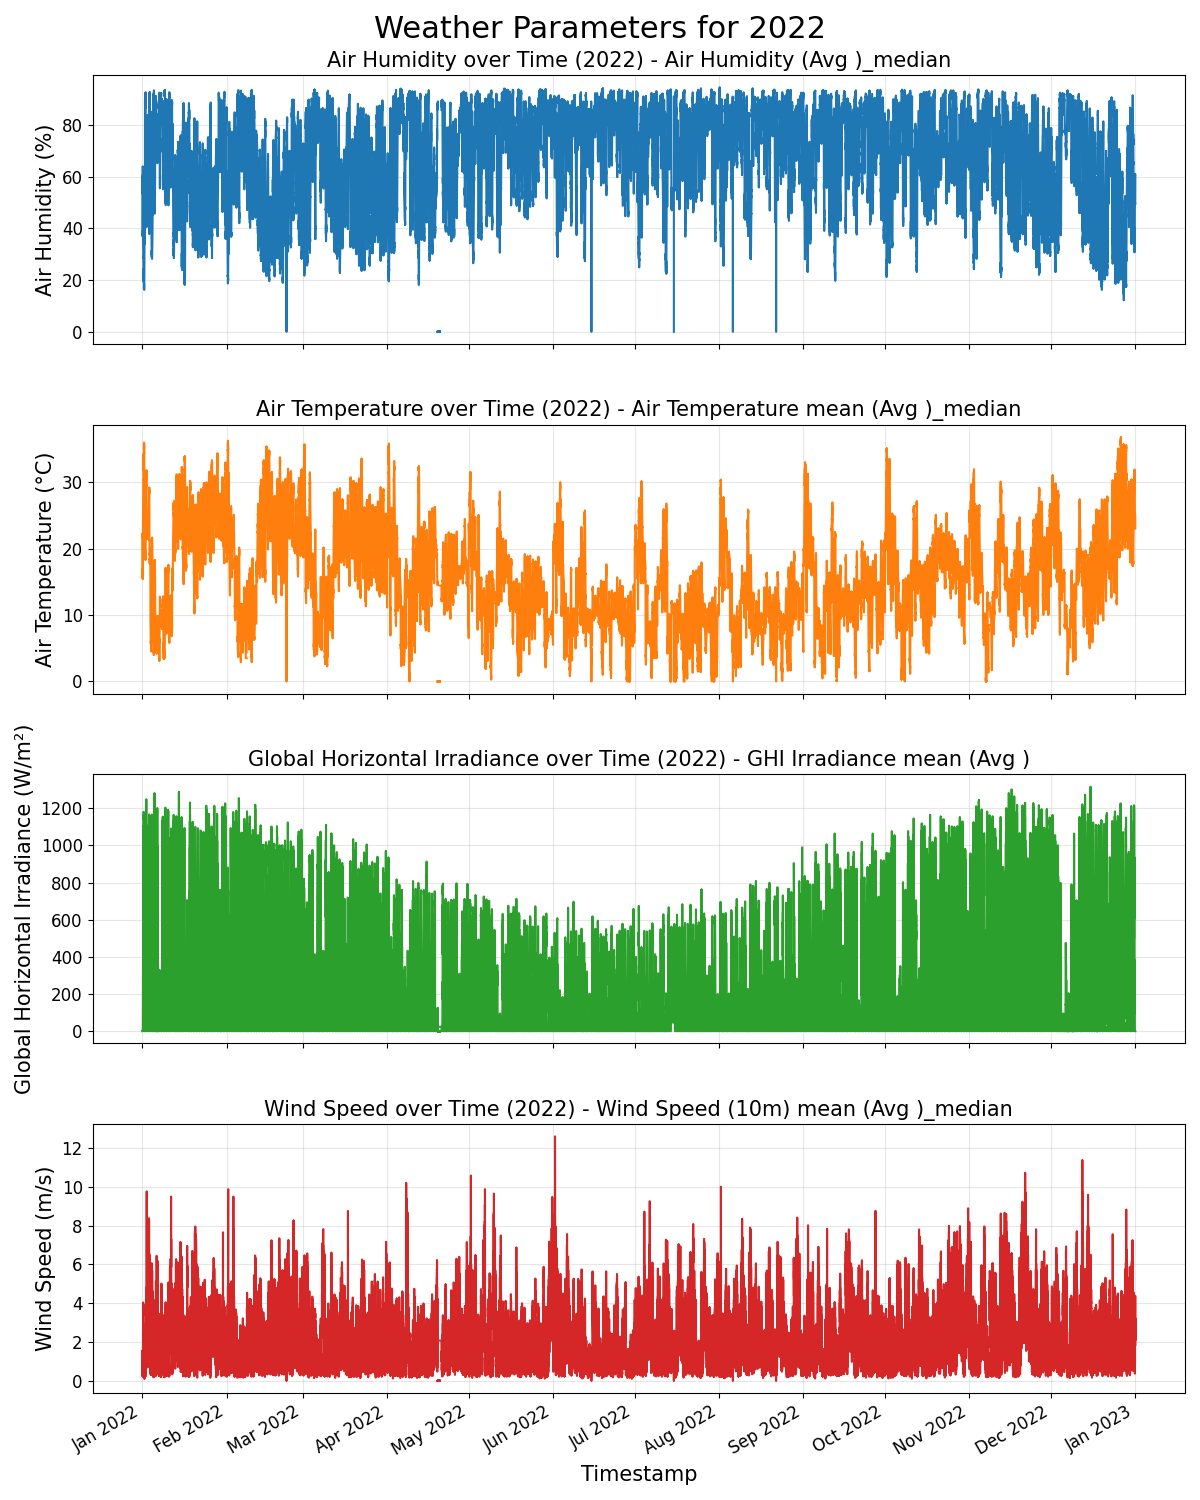

In [15]:
%matplotlib ipympl

# the weather data file directory
PVsyst_weather = r"C:\Users\z5183876\OneDrive - UNSW\Documents\GitHub\25_08_26_Bomen_bifacial_gain\Results\PVsyst_weather_2022.csv"

# read the csv file from the directory
PVsyst_weather_df = pd.read_csv(PVsyst_weather)

# print the columns
print(PVsyst_weather_df.columns)

# ensure the Timestamp column is in datetime format
PVsyst_weather_df['Timestamp'] = pd.to_datetime(PVsyst_weather_df['Timestamp'], errors='coerce')

# Create a figure with 4 subplots stacked vertically
fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

# Lists to store column names and corresponding labels
columns = []
labels = []
units = []

# Find the columns for each parameter - using specific column names
humidity_col = [col for col in PVsyst_weather_df.columns if 'Air Humidity' in col and 'median' in col]
temperature_col = [col for col in PVsyst_weather_df.columns if 'Air Temperature' in col and 'median' in col]
# Changed to use 'GHI Irradiance mean (Avg )' instead of the median version
ghi_col = ['GHI Irradiance mean (Avg )'] if 'GHI Irradiance mean (Avg )' in PVsyst_weather_df.columns else []
# Specify the exact wind speed column name
wind_speed_col = ['Wind Speed (10m) mean (Avg )_median'] if 'Wind Speed (10m) mean (Avg )_median' in PVsyst_weather_df.columns else []

# Print which columns were found
print(f"Humidity column found: {humidity_col}")
print(f"Temperature column found: {temperature_col}")
print(f"GHI column found: {ghi_col}")
print(f"Wind speed column found: {wind_speed_col}")

# Collect found columns or notify if missing
parameters = [
    (humidity_col, 'Air Humidity', '%'),
    (temperature_col, 'Air Temperature', '°C'),
    (ghi_col, 'Global Horizontal Irradiance', 'W/m²'),
    (wind_speed_col, 'Wind Speed', 'm/s')
]


# Plot each parameter in its own subplot
for i, (col_list, param_name, unit) in enumerate(parameters):
    ax = axes[i]
    
    if col_list:
        col = col_list[0]  # Take the first match
        ax.plot(PVsyst_weather_df['Timestamp'], PVsyst_weather_df[col], 
                linewidth=1.5, color=f'C{i}')
        ax.set_ylabel(f'{param_name} ({unit})', fontsize=axis_label_size)
        ax.set_title(f'{param_name} over Time (2022) - {col}', fontsize=axis_label_size)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=axis_num_size)
        
        # Print statistics for this parameter
        print(f"\nStatistics for {col}:")
        print(f"Min: {PVsyst_weather_df[col].min():.2f} {unit}")
        print(f"Max: {PVsyst_weather_df[col].max():.2f} {unit}")
        print(f"Mean: {PVsyst_weather_df[col].mean():.2f} {unit}")
        print(f"Median: {PVsyst_weather_df[col].median():.2f} {unit}")
    else:
        ax.text(0.5, 0.5, f"No {param_name} data found", 
                ha='center', va='center', fontsize=12, transform=ax.transAxes)
        print(f"No column found for {param_name}")

# Format the shared x-axis
axes[-1].set_xlabel('Timestamp', fontsize=axis_label_size)
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[-1].xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for better readability
fig.autofmt_xdate()

# Add an overall title
fig.suptitle('Weather Parameters for 2022', fontsize=title_size, y=0.99)

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3)

# Show the plot
plt.show()

# 3. Simulation results visualisation

## 3.1. Data loading

In [24]:
# simulation results directory
simulation_results_dir = r"C:\Users\z5183876\OneDrive - UNSW\Documents\GitHub\25_08_26_Bomen_bifacial_gain\Data\25_08_25_Bowen Solar Farm 2022_VCG_HourlyRes_1.CSV"

# Read the CSV file with specific parameters:
# - Skip to row 11 which contains the column headers
# - Use row 11 as header (header=0 means first row after skiprows)
# - Skip 2 more rows after header (rows 12-13) to get to data at row 14
simulation_results_df = pd.read_csv(
    simulation_results_dir, 
    skiprows=10,     # Skip the first 10 rows to get to header at row 11
    header=0,        # Use the first row after skipping as header
    sep=';',         # Use semicolon as delimiter
    encoding='latin-1',  # Keep the encoding that worked
    skipfooter=0     # Skip no rows at the end
)

# Alternative method if the above doesn't work:
# simulation_results_df = pd.read_csv(
#     simulation_results_dir, 
#     skiprows=13,    # Skip all rows up to and including row 13
#     header=None,    # Don't use any row as header
#     sep=';',        # Use semicolon as delimiter
#     encoding='latin-1'
# )
# Then manually set column names if needed

# ensure that the 'date' column is in datetime format
simulation_results_df['date'] = pd.to_datetime(simulation_results_df['date'], errors='coerce')
# rename it as 'timestamp'
simulation_results_df.rename(columns={'date': 'timestamp'}, inplace=True)
# remove the first row of data
simulation_results_df = simulation_results_df.iloc[1:]

# print the shape and first few rows
print(f"DataFrame shape: {simulation_results_df.shape}")
print("\nFirst few rows:")
print(simulation_results_df.head())

# print the columns
print("\nColumns:")
print(simulation_results_df.columns.tolist())

# print whether 'EArray' column exists
print(f"Does 'EArray' column exist? {'EArray' in simulation_results_df.columns}")

C:\Users\z5183876\AppData\Local\Temp\ipykernel_41860\3000999250.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  simulation_results_df = pd.read_csv(
C:\Users\z5183876\AppData\Local\Temp\ipykernel_41860\3000999250.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  simulation_results_df['d

DataFrame shape: (8760, 156)

First few rows:
            timestamp    HSol    AzSol  AngInc AngProf  PlTilt PlAzim  \
1 2022-01-01 00:00:00       0        0      90       0       0     90   
2 2022-01-01 01:00:00       0        0      90       0       0     90   
3 2022-01-01 02:00:00       0        0      90       0       0     90   
4 2022-01-01 03:00:00       0        0      90       0       0     90   
5 2022-01-01 04:00:00  1.1619  -117.59  87.477  1.3109  1.5353    -90   

    PhiAng GlobHor DiffHor  ...       Yf Lc      Ls Lcr Lsr PR DiffGnd PRBifi  \
1        0       0       0  ...  -0.0687  0  0.0687   1   1  0       0      0   
2        0       0       0  ...  -0.0687  0  0.0687   1   1  0       0      0   
3        0       0       0  ...  -0.0687  0  0.0687   1   1  0       0      0   
4        0       0       0  ...  -0.0687  0  0.0687   1   1  0       0      0   
5  -1.5353       0       0  ...  -0.0687  0  0.0687   1   1  0       0      0   

  OptimizerCost  RelHum  
1 

## 3.2. Visualisation

Number of maintenance-free days: 275


C:\Users\z5183876\AppData\Local\Temp\ipykernel_41860\3761162217.py:14: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  df_2022_filtered = df_2022[np.in1d(df_2022.index.date, maintenance_free_dates)].copy()
C:\Users\z5183876\AppData\Local\Temp\ipykernel_41860\3761162217.py:17: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  simulation_2022_filtered = simulation_2022[np.in1d(simulation_2022['timestamp'].dt.date, maintenance_free_dates)].copy()


Original 2022 data points: df=105120, simulation=8760
Filtered maintenance-free days points: df=79200, simulation=6600
Number of days in combined dataframe: 275

Daily energy comparison (first 5 days):
                Actual  Simulation
2022-01-01  980.006500   1103.2553
2022-01-02  730.827167    504.6968
2022-01-03  825.216167    373.2769
2022-01-04  942.164667    674.7430
2022-01-05  543.601583    565.8290


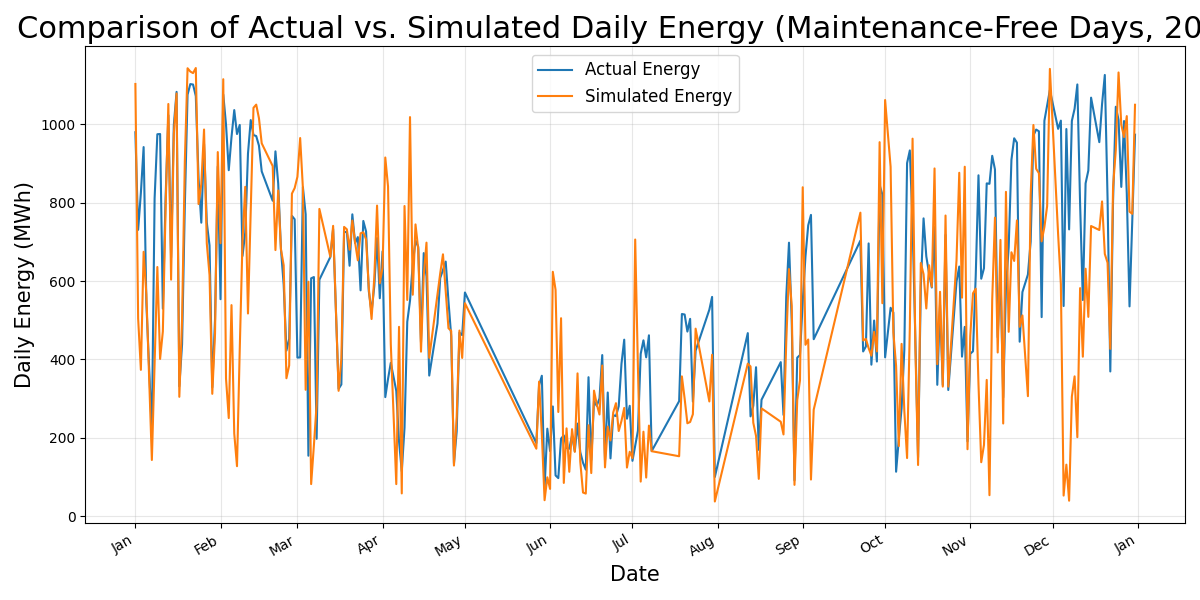


Statistics for Daily Energy (MWh) - Maintenance-Free Days Only:
Actual - Min: 72.08 MWh
Actual - Max: 1126.31 MWh
Actual - Mean: 585.81 MWh
Actual - Total: 161097.11 MWh

Simulation - Min: 37.16 MWh
Simulation - Max: 1144.04 MWh
Simulation - Mean: 522.15 MWh
Simulation - Total: 143592.45 MWh

Comparison Metrics:
Mean Absolute Error: 169.43 MWh
Mean Bias Error: -63.65 MWh
Root Mean Square Error (RMSE): 256.69 MWh
Coefficient of RMSE (CRMSE): 43.82%
Ratio of Simulated to Actual Total Energy: 0.8913


In [30]:
maintenance_free_days_file = r"C:\Users\z5183876\OneDrive - UNSW\Documents\GitHub\25_08_26_Bomen_bifacial_gain\Results\maintenance_free_days_2022.txt"
with open(maintenance_free_days_file, 'r') as f:
    maintenance_free_days = [line.strip() for line in f if line.strip() and not line.startswith('//')]

# Convert to datetime for filtering
maintenance_free_days = pd.to_datetime(maintenance_free_days)
print(f"Number of maintenance-free days: {len(maintenance_free_days)}")

# Create a list of maintenance-free dates (as datetime.date objects)
maintenance_free_dates = [d.date() for d in maintenance_free_days]

# Filter df_2022 to include only maintenance-free days
# Using numpy's in1d function instead of isin for compatibility with numpy arrays
df_2022_filtered = df_2022[np.in1d(df_2022.index.date, maintenance_free_dates)].copy()

# Filter simulation_2022 to include only maintenance-free days
simulation_2022_filtered = simulation_2022[np.in1d(simulation_2022['timestamp'].dt.date, maintenance_free_dates)].copy()

print(f"Original 2022 data points: df={len(df_2022)}, simulation={len(simulation_2022)}")
print(f"Filtered maintenance-free days points: df={len(df_2022_filtered)}, simulation={len(simulation_2022_filtered)}")

# Continue with the rest of the code as before...
# Convert power to daily energy (MWh)
daily_energy_actual = df_2022_filtered['Power'].div(1000).resample('D').mean() * 24  # kW -> MW -> MWh
daily_energy_actual.name = 'Actual Energy (MWh)'

# For simulation: Resample to daily values and calculate energy
daily_energy_sim = simulation_2022_filtered.set_index('timestamp')['EArray'].resample('D').sum()
daily_energy_sim.name = 'Simulated Energy (MWh)'

# Combine into a single dataframe for easier plotting
daily_energy_df = pd.DataFrame({
    'Actual': daily_energy_actual,
    'Simulation': daily_energy_sim
})

# Drop any days with NaN values
daily_energy_df = daily_energy_df.dropna()

print(f"Number of days in combined dataframe: {len(daily_energy_df)}")
print("\nDaily energy comparison (first 5 days):")
print(daily_energy_df.head())

# Create the daily energy comparison plot
plt.figure(figsize=long_hoz_figsize)

# Plot both daily energy series
plt.plot(daily_energy_df.index, daily_energy_df['Actual'], 
         label='Actual Energy', color='#1f77b4', linewidth=1.5)
plt.plot(daily_energy_df.index, daily_energy_df['Simulation'], 
         label='Simulated Energy', color='#ff7f0e', linewidth=1.5)

# Add labels and title
plt.xlabel('Date', fontsize=axis_label_size)
plt.ylabel('Daily Energy (MWh)', fontsize=axis_label_size)
plt.title('Comparison of Actual vs. Simulated Daily Energy (Maintenance-Free Days, 2022)', fontsize=title_size)

# Add legend and grid
plt.legend(fontsize=text_size)
plt.grid(True, alpha=0.3)

# Format the date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print some statistics for the daily energy comparison
print("\nStatistics for Daily Energy (MWh) - Maintenance-Free Days Only:")
print(f"Actual - Min: {daily_energy_df['Actual'].min():.2f} MWh")
print(f"Actual - Max: {daily_energy_df['Actual'].max():.2f} MWh")
print(f"Actual - Mean: {daily_energy_df['Actual'].mean():.2f} MWh")
print(f"Actual - Total: {daily_energy_df['Actual'].sum():.2f} MWh")

print(f"\nSimulation - Min: {daily_energy_df['Simulation'].min():.2f} MWh")
print(f"Simulation - Max: {daily_energy_df['Simulation'].max():.2f} MWh")
print(f"Simulation - Mean: {daily_energy_df['Simulation'].mean():.2f} MWh")
print(f"Simulation - Total: {daily_energy_df['Simulation'].sum():.2f} MWh")

# Calculate comparison metrics
print("\nComparison Metrics:")
# Mean Absolute Error
mae = np.mean(np.abs(daily_energy_df['Actual'] - daily_energy_df['Simulation']))
print(f"Mean Absolute Error: {mae:.2f} MWh")

# Mean Bias Error
mbe = np.mean(daily_energy_df['Simulation'] - daily_energy_df['Actual'])
print(f"Mean Bias Error: {mbe:.2f} MWh")

# Root Mean Square Error
rmse = np.sqrt(np.mean((daily_energy_df['Actual'] - daily_energy_df['Simulation'])**2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f} MWh")

# Coefficient of Root Mean Square Error (CRMSE) - normalized RMSE as percentage of mean
crmse = (rmse / daily_energy_df['Actual'].mean()) * 100
print(f"Coefficient of RMSE (CRMSE): {crmse:.2f}%")

# Ratio of total energy
ratio = daily_energy_df['Simulation'].sum() / daily_energy_df['Actual'].sum()
print(f"Ratio of Simulated to Actual Total Energy: {ratio:.4f}")